<a href="https://colab.research.google.com/github/Ken-huea/Time-series-analysis/blob/main/%E3%82%B1%E3%83%A9%E3%82%B9%E3%81%AE%E3%82%AF%E3%83%A9%E3%82%B9%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C_my_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# irisの分類問題
・ケラス/ディープラーニングでの機械学習での分類予測。

本気で検証してみる。

ポイント：callbacks関数を用いた、
- 過学習防止(学習打ち止め)
- epock数の中で一番良いモデルを使用する事。⇒最後に学習したモデルが最良とは限らない。

### 読込とデータ分割

トレインデータは⇒正規化

In [ ]:
# 連続値データの読み込み
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [ ]:
# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(
    iris['data'], 
    iris['target'], 
    test_size=0.3,  
    random_state=0
)

ディープラーニングする際に

トレーニングデータを正規化させます。

テストデータはone hot bectle化させます。

In [ ]:
# 正規化（Normarization）
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()

X_train_n = scaler_x.fit_transform(X_train)
y_train_n = scaler_x.fit_transform(y_train)

X_train_n.shape, y_train_n.shape, X_test.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### ベクトル化
テストデータは⇒one hot bectle化

分類問題なのでtargetに<font color="red">one hot ベクトル化</font>を施す必要がある。

カテゴリに対して有効。0と1とに分ける。見てみればすぐピンと来るはず。

⇒このベクトルを予想する。

y_trainをベクトル化。クラスの数は合計3つ。だから第二引数に３を設定。

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

one hot encording処理。後々精度予測(accucy)にy_testを用いるので。上書きはダメ

In [ ]:
# One-Hotエンコーダー
X_test_hot = pd.get_dummies(X_test, dummy_na=False)
y_test_hot = pd.get_dummies(y_test, dummy_na=False)

In [ ]:
y_test_hot.head(5)

,0,1,2
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


### 学習

In [ ]:
# 基本モデル生成
from keras.models import Sequential # 基本モデルのクラス
model = Sequential()

分類問題の出力層の活性化関数は <font color="red">softmax</font> を用いる事。

In [ ]:
# 層の追加

from keras.layers import Dense # 層
from keras.layers import core  # 活性化関数
from keras.layers import ReLU,Softmax  # 活性化関数発展版

# 中間層
model.add(
    Dense(
        128,# ユニット数 
        input_shape=(4,), # 入力ベクトルの次元数の指定. 説明変数の数と同じになっている。今回は説明変数は４．
        activation=ReLU() # 活性化関数　ReLU
    )
)

# 中間層
model.add(
    Dense(
        128,# ユニット数 
        activation=ReLU() # 活性化関数　ReLU
    )
)

# 中間層
model.add(
    Dense(
        128,# ユニット数 
        activation=ReLU() # 活性化関数　ReLU
    )
)

# 出力層
model.add(
    Dense(
        3,                   # ここも３。出力される分類が３つだから。
        activation=Softmax() # 活性化関数　softmax
    )
)

In [ ]:

from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.1)

# モデルの学習設定
from keras import losses     # 損失関数
from keras import optimizers # 重み更新法
model.compile(
    loss=losses.categorical_crossentropy,    # 損失関数　平均二乗誤差
    optimizer=sgd,# 重み更新法　確率的勾配降下法
    metrics=["accuracy"] # Aidemyから拝借。
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras import callbacks                   # コールバック（1epoch終了毎に呼び出される）
import keras
# モデルの学習
history = model.fit(
    X_train_n,
    X_test_hot,
    batch_size=32,
    epochs=300, 

    validation_data=(y_train_n,y_test_hot),        # コールバックする際はvalidation dataも準備する。
    callbacks=[
        callbacks.EarlyStopping(monitor='val_loss',patience=30),
        callbacks.ModelCheckpoint(filepath = './model/best_model.h5',monitor='', save_best_only=True) # 最良のモデルを保存。
        ]
)

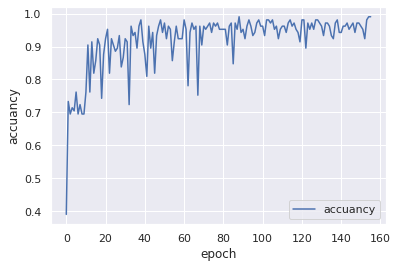

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="accuancy", ls="-")
plt.ylabel("accuancy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

#### 学習過程の保存（ModelCheckpoint）

In [ ]:
# その最良のモデルを読み込み
import numpy as np
model_best = keras.models.load_model('./model/best_model.h5')
y_predict = np.argmax(model_best.predict(y_train_n),axis=1)
print(y_predict)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


### Accucyを算出

その読み込んだ最適モデルを用いて<font color="red">accucy</font>を算出

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.9777777777777777


# 考察

精度(正解率)はかなり高く出す事が出来た。

本当ならばトレインデータ、テストデータ、バリデーションデータ。

説明変数と目的変数で合計6分割しないといけないと思う。

だけど今回はそのやり方もピンと来ないしデータも多くないのでバリデーションデータにてうとデータを用いるという横着を致しました。